# M.M.V.Sathvik
# AIE21073
# LAB - 5

### A1.Use numpy.fft.fft()to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.Use numpy.fft.ifft()to inverse transform the frequency spectrumto time domain signal.

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.signal as signal
import scipy.io.wavfile as wavfile
from glob import glob
import seaborn as sns
from scipy.signal import spectrogram

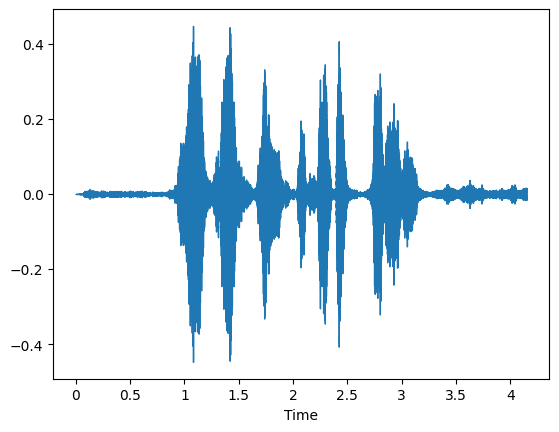

In [2]:
y, sr = librosa.load('/content/AI in speech processing.wav')
librosa.display.waveshow(y)

In [4]:
a = glob('/content/AI in speech processing.wav')
ipd.Audio(a[0])

In [5]:
# Using numpy.fft.fft() to transform the speech signal to its spectral domain
fft_result = np.fft.fft(y)
print("after fft:")
ipd.display(ipd.Audio(fft_result, rate=sr))

after fft:


/usr/local/lib/python3.10/dist-packages/IPython/lib/display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [6]:
# Calculating the amplitude spectrum (absolute values of the complex numbers)
amplitude_spectrum = np.abs(fft_result)
print("amplitude spectrum")
ipd.display(ipd.Audio(amplitude_spectrum, rate=sr))

amplitude spectrum


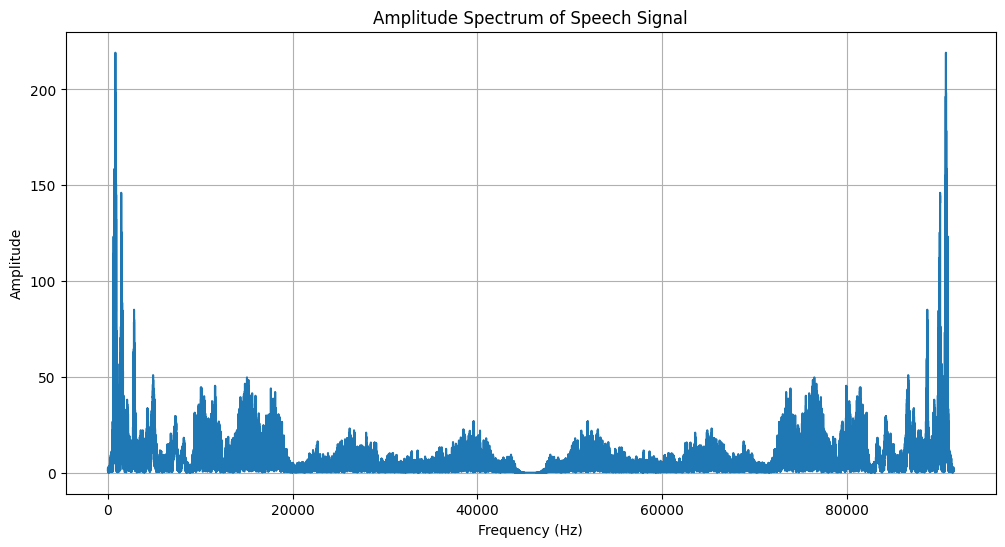

In [7]:
#plotting the amplitude spectrum
plt.figure(figsize=(12, 6))
plt.plot(amplitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [8]:
# Using numpy.fft.ifft() to transform the speech signal from frequency domain to its time domain
ifft_result = np.fft.ifft(fft_result)
print("after reconstruction")
ipd.Audio(np.real(ifft_result), rate=sr)

after reconstruction


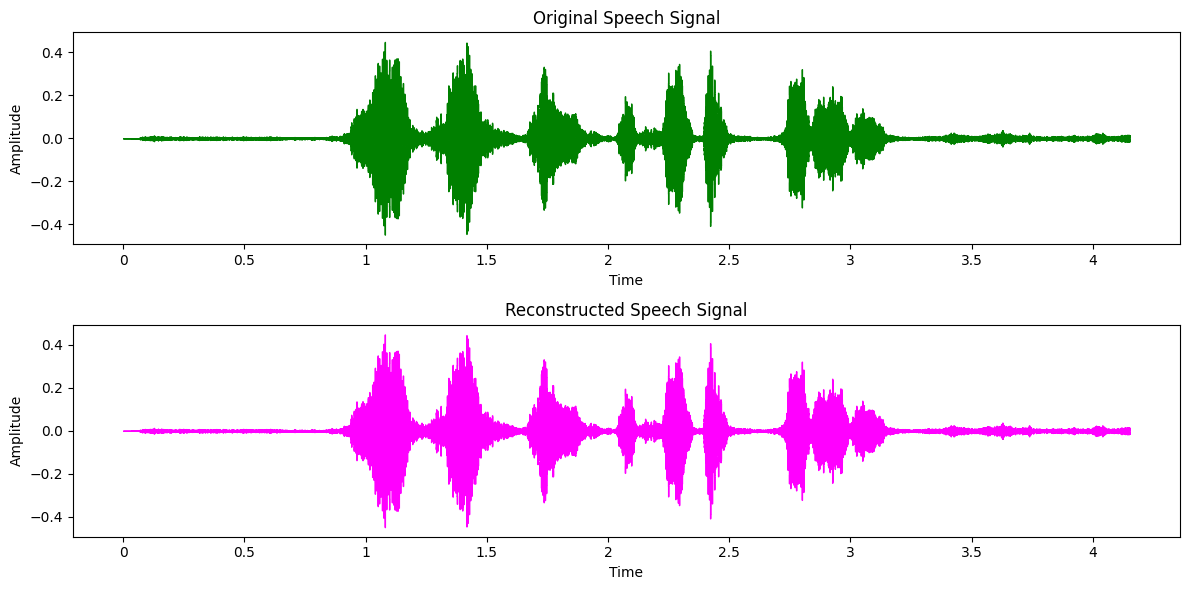

In [9]:
# Plot the original and reconstructed signals for comparison
plt.figure(figsize=(12, 6))

# Plot the original signal
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the reconstructed signal
plt.subplot(2, 1, 2)
librosa.display.waveshow(np.real(ifft_result), sr=sr, color='magenta')  # Use np.real() to extract the real part
plt.title('Reconstructed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

### A2. Use a rectangular window to select the low frequency components from your spectrum.Inverse transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high pass frequencies of spectrum.

In [10]:
# Function to apply window and inverse transform
def apply_window_and_inverse_transform(fft_data, window):
    # Apply the window to the spectrum
    windowed_spectrum = fft_data * window

    # Inverse transform the filtered spectrum
    filtered_signal = np.fft.ifft(windowed_spectrum)

    return filtered_signal

In [11]:
# Rectangular window for low-pass filter
low_pass_window = np.ones_like(fft_result)
low_pass_cutoff = 500
low_pass_window[low_pass_cutoff:] = 0


In [12]:
# Apply the low-pass window and inverse transform
filtered_low_pass = apply_window_and_inverse_transform(fft_result, low_pass_window)

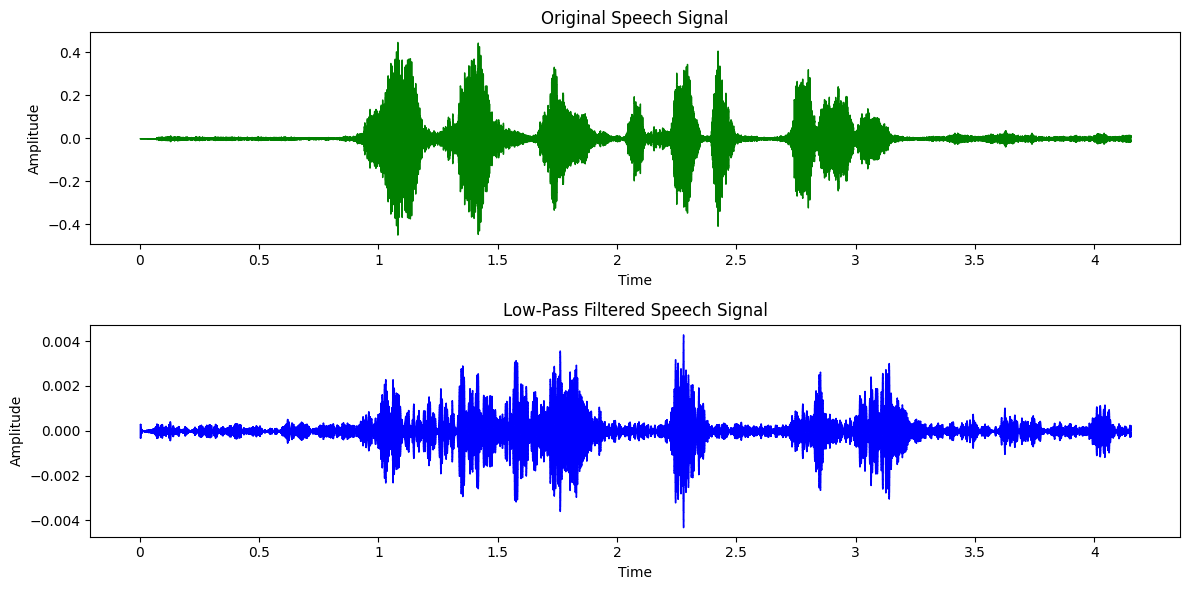

In [13]:
# Plot the original and low-pass filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
librosa.display.waveshow(np.real(filtered_low_pass), sr=sr, color='blue')
plt.title('Low-Pass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [14]:
ipd.Audio(np.real(filtered_low_pass), rate=sr)

In [15]:
# Bandpass filter window
bandpass_window = np.zeros_like(fft_result)
bandpass_low_cutoff = 500
bandpass_high_cutoff = 1500
bandpass_window[bandpass_low_cutoff:bandpass_high_cutoff] = 1

In [16]:
filtered_bandpass = apply_window_and_inverse_transform(fft_result, bandpass_window)

Text(101.09722222222221, 0.5, 'Amplitude')

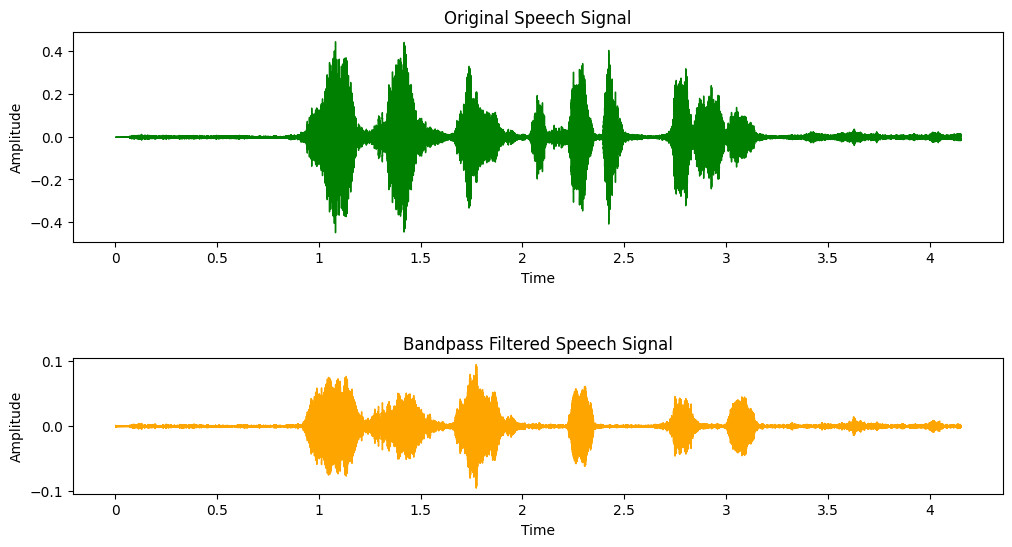

In [17]:
# Plot the original and bandpass filtered signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.subplot(3, 1, 3)
librosa.display.waveshow(np.real(filtered_bandpass), sr=sr, color='orange')
plt.title('Bandpass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

In [18]:
ipd.Audio(np.real(filtered_bandpass), rate=sr)

In [19]:
# High-pass filter window
high_pass_window = np.ones_like(fft_result)
high_pass_cutoff = 1500
high_pass_window[:high_pass_cutoff] = 0


In [20]:
# Apply the high-pass window and inverse transform
filtered_high_pass = apply_window_and_inverse_transform(fft_result, high_pass_window)

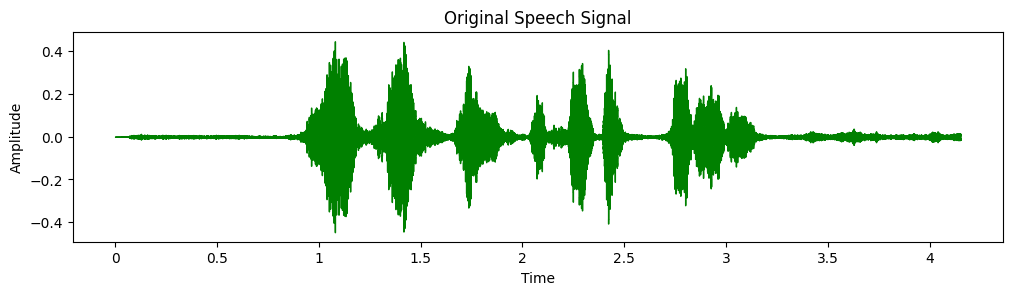

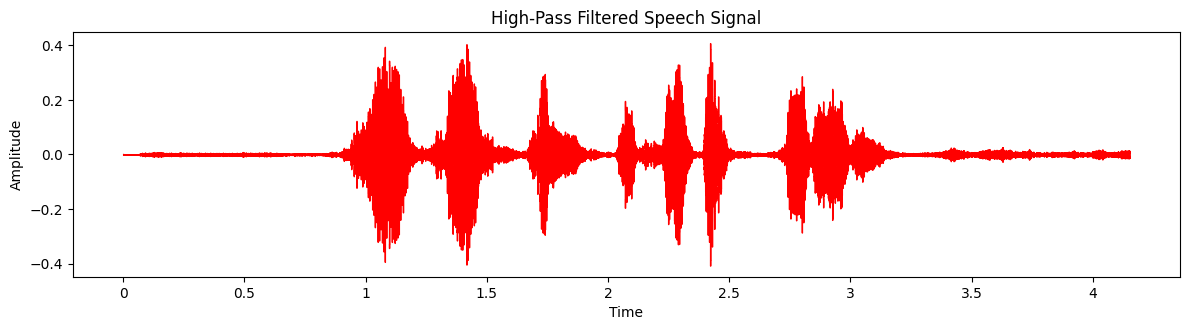

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(np.real(filtered_high_pass), sr=sr, color='red')
plt.title('High-Pass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [22]:
ipd.Audio(np.real(filtered_high_pass), rate=sr)

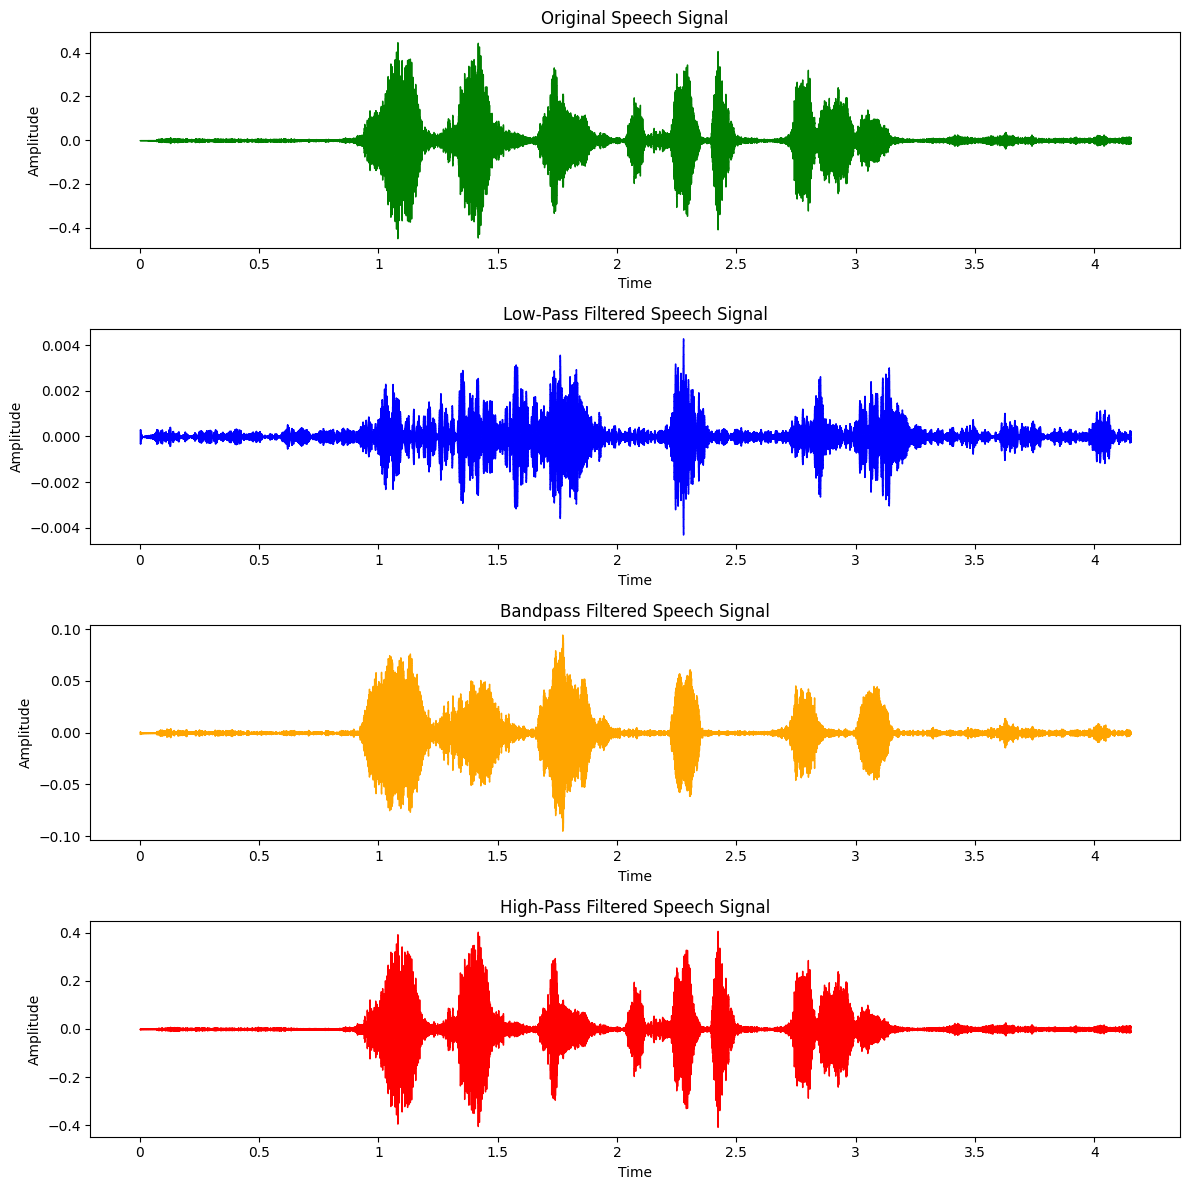

In [23]:
plt.figure(figsize=(12, 12))

# Original Speech Signal
plt.subplot(4, 1, 1)
librosa.display.waveshow(y, sr=sr, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Low-Pass Filtered Speech Signal
plt.subplot(4, 1, 2)
librosa.display.waveshow(np.real(filtered_low_pass), sr=sr, color='blue')
plt.title('Low-Pass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Bandpass Filtered Speech Signal
plt.subplot(4, 1, 3)
librosa.display.waveshow(np.real(filtered_bandpass), sr=sr, color='orange')
plt.title('Bandpass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# High-Pass Filtered Speech Signal
plt.subplot(4, 1, 4)
librosa.display.waveshow(np.real(filtered_high_pass), sr=sr, color='red')
plt.title('High-Pass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


### A3. Repeat A2 with other filter types such as Cosine / Gausian filters.

In [24]:
cosine_window = np.cos(np.linspace(0, np.pi, len(fft_result)))
cosine_window /= np.max(cosine_window)

In [25]:
# Apply the cosine window and inverse transform
filtered_cosine = apply_window_and_inverse_transform(fft_result, cosine_window)

Text(44.347222222222214, 0.5, 'Amplitude')

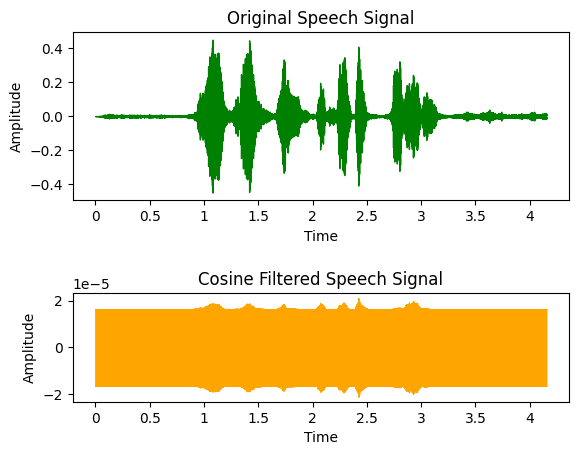

In [26]:
# Plot the original and cosine filtered signal

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3,1,3)
librosa.display.waveshow(np.real(filtered_cosine), sr=sr, color='orange')
plt.title('Cosine Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

In [27]:
# Play the cosine filtered audio
ipd.Audio(np.real(filtered_cosine), rate=sr)

In [28]:
# Gaussian filter window
gaussian_window = np.exp(-(np.arange(len(fft_result)) - len(fft_result) / 2)**2 / (2 * (len(fft_result) / 8)**2))

In [29]:
# Apply the Gaussian window and inverse transform
filtered_gaussian = apply_window_and_inverse_transform(fft_result, gaussian_window)

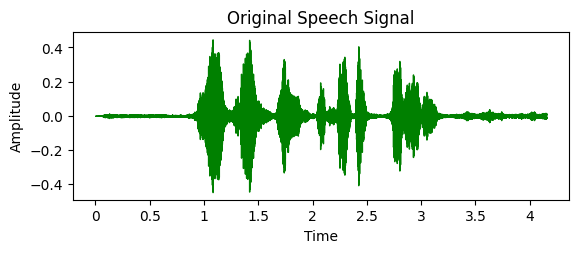

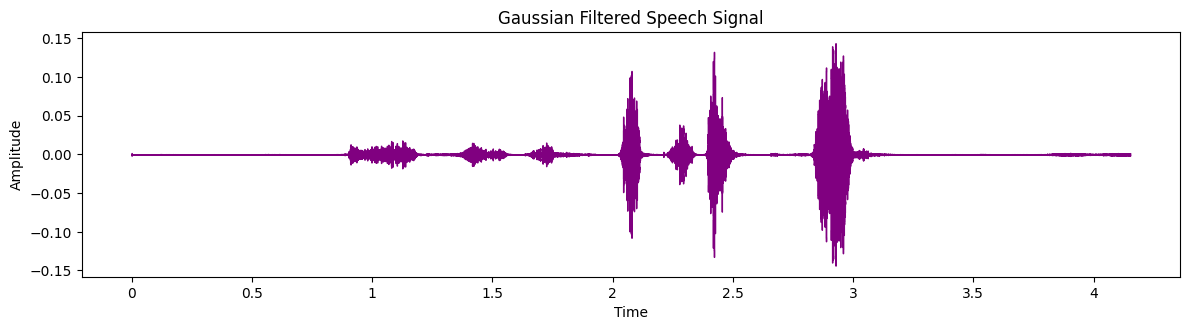

In [30]:
# Plot the Gaussian filtered signal

# Original and Gaussian filtered signals
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
librosa.display.waveshow(np.real(filtered_gaussian), sr=sr, color='purple')
plt.title('Gaussian Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [31]:
# Play the Gaussian filtered audio
ipd.Audio(np.real(filtered_gaussian), rate=sr)